# Análisis Exploratorio de Datos (EDA) - Exportaciones de Cobre

Este notebook tiene como objetivo explorar los datos mensuales de exportaciones físicas de cobre chileno, analizar tendencias y estacionalidades, y preparar la información para modelado de series de tiempo.


In [1]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones visuales
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

## Carga de datos

Se carga el archivo Excel descargado desde COCHILCO, ubicado en la carpeta `data/raw/`.


In [2]:
file_path = "../data/raw/02_07_2025__23_30_41.xls"

df = pd.read_excel(file_path, skiprows=2)
df.head()

,Periodo,Embarques Cobre Refinados (1),Embarques Cobre Blíster (2),Embarques Cobre Graneles (3),Totales
0,ene-2003,282.500000,18.900000,168.899994,470.299988
1,feb-2003,187.000000,13.400000,174.899994,375.299988
2,mar-2003,183.600006,8.500000,150.600006,342.700012
3,abr-2003,230.300003,32.200001,130.000000,392.500000
4,may-2003,245.899994,20.799999,107.500000,374.199982


## Revisión general del dataset

Se verifican tipos de datos, valores nulos y estadísticas descriptivas básicas.

In [3]:
# Tipos de datos
print(df.dtypes)

# Valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
df.describe()

Periodo                           object
Embarques Cobre Refinados (1)    float64
Embarques Cobre Blíster (2)      float64
Embarques Cobre Graneles (3)     float64
Totales                          float64
dtype: object
Periodo                          0
Embarques Cobre Refinados (1)    0
Embarques Cobre Blíster (2)      0
Embarques Cobre Graneles (3)     0
Totales                          0
dtype: int64


,Embarques Cobre Refinados (1),Embarques Cobre Blíster (2),Embarques Cobre Graneles (3),Totales
count,268.000000,268.000000,268.000000,268.000000
mean,212.428778,30.530882,218.529688,461.489345
std,43.797688,12.425004,68.668405,69.346126
min,86.776123,2.747500,67.221321,261.391052
25%,183.075642,21.728342,163.860954,413.194580
50%,212.008743,29.755780,210.215233,457.484238
75%,241.347500,38.267908,266.547195,507.624992
max,362.471588,79.936661,408.928619,636.357300


## Limpieza y transformación inicial

- Se convierte la columna de fecha al tipo datetime.  
- Se renombran columnas para facilitar el manejo.  
- Se seleccionan solo las columnas necesarias para el análisis.

In [4]:
df.rename(columns={
    'Periodo': 'Fecha',
    'Embarques Cobre Refinados (1)': 'Cobre_Refinado_TM',
    'Embarques Cobre Blíster (2)': 'Cobre_Blister_TM',
    'Embarques Cobre Graneles (3)': 'Cobre_Granel_TM',
    'Totales': 'Total_TM'
}, inplace=True)

month_translation = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Convertir meses y luego a datetime
df['Fecha'] = df['Fecha'].str.lower().replace(month_translation, regex=True)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%Y')

df = df[['Fecha', 'Total_TM', 'Cobre_Refinado_TM', 'Cobre_Blister_TM', 'Cobre_Granel_TM']]
df.head()

,Fecha,Total_TM,Cobre_Refinado_TM,Cobre_Blister_TM,Cobre_Granel_TM
0,2003-01-01,470.299988,282.500000,18.900000,168.899994
1,2003-02-01,375.299988,187.000000,13.400000,174.899994
2,2003-03-01,342.700012,183.600006,8.500000,150.600006
3,2003-04-01,392.500000,230.300003,32.200001,130.000000
4,2003-05-01,374.199982,245.899994,20.799999,107.500000


## Visualización inicial de las series de tiempo

Se grafican las exportaciones totales y por tipo de producto para identificar tendencias y patrones.

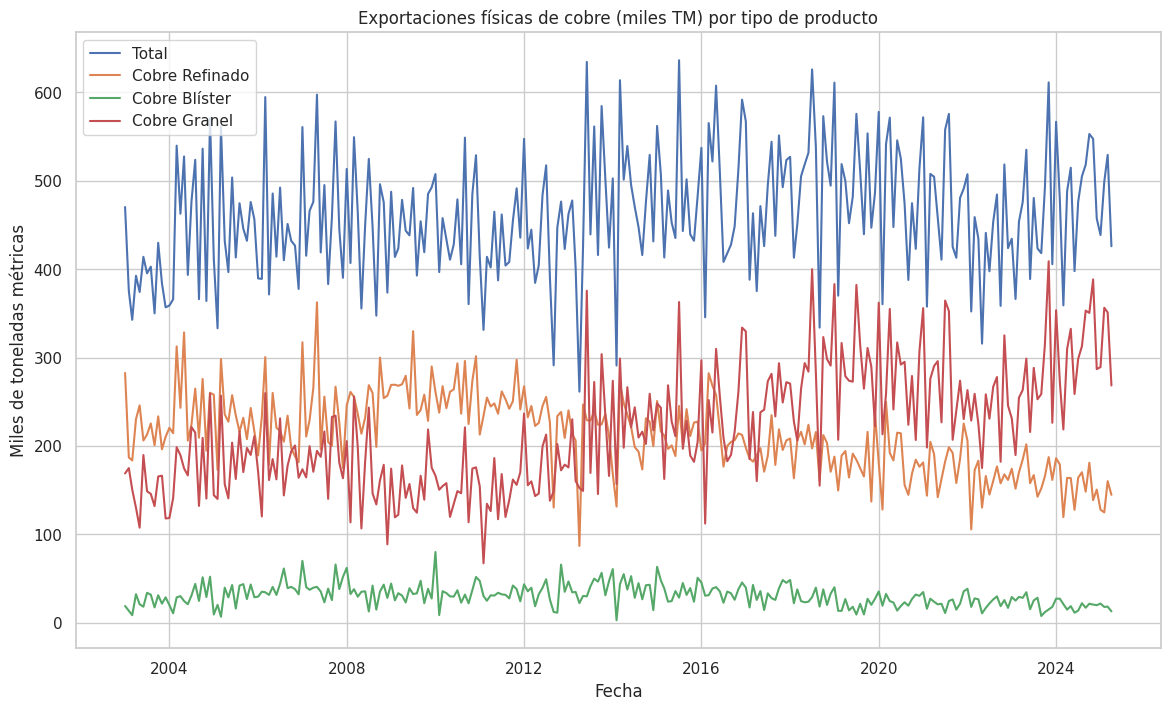

In [5]:
plt.figure(figsize=(14,8))

plt.plot(df['Fecha'], df['Total_TM'], label='Total')
plt.plot(df['Fecha'], df['Cobre_Refinado_TM'], label='Cobre Refinado')
plt.plot(df['Fecha'], df['Cobre_Blister_TM'], label='Cobre Blíster')
plt.plot(df['Fecha'], df['Cobre_Granel_TM'], label='Cobre Granel')

plt.title('Exportaciones físicas de cobre (miles TM) por tipo de producto')
plt.xlabel('Fecha')
plt.ylabel('Miles de toneladas métricas')
plt.legend()
plt.show()

## Análisis de correlaciones

Se calcula la correlación entre los diferentes tipos de exportaciones para entender su relación.

                   Total_TM  Cobre_Refinado_TM  Cobre_Blister_TM   
Total_TM           1.000000           0.342629          0.331040  \
Cobre_Refinado_TM  0.342629           1.000000          0.446148   
Cobre_Blister_TM   0.331040           0.446148          1.000000   
Cobre_Granel_TM    0.731437          -0.372531         -0.131194   

                   Cobre_Granel_TM  
Total_TM                  0.731437  
Cobre_Refinado_TM        -0.372531  
Cobre_Blister_TM         -0.131194  
Cobre_Granel_TM           1.000000  


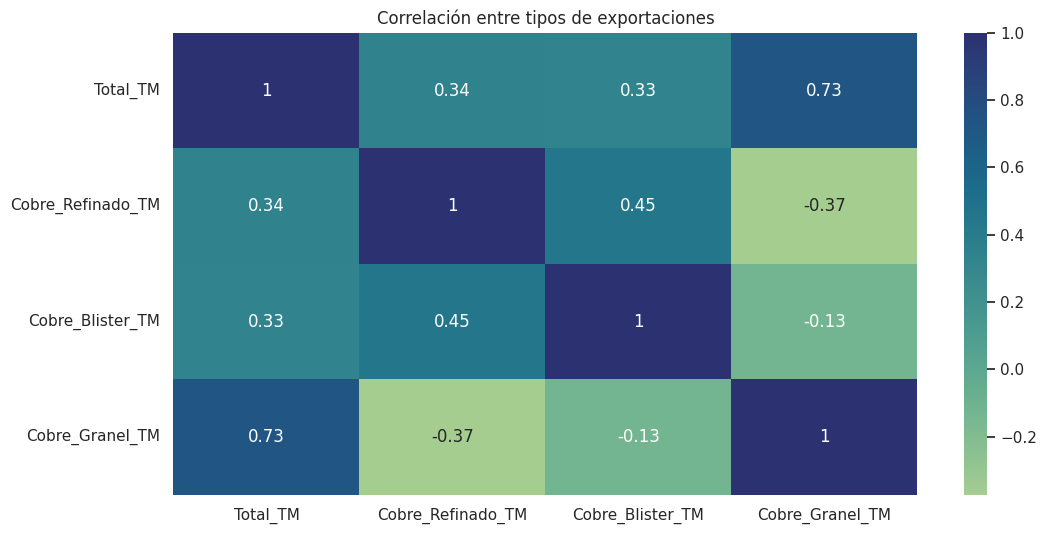

In [7]:
corr = df[['Total_TM', 'Cobre_Refinado_TM', 'Cobre_Blister_TM', 'Cobre_Granel_TM']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlación entre tipos de exportaciones')
plt.show()

## Comentarios y siguientes pasos

- Se observan las principales tendencias y relaciones entre los tipos de productos.  
- El siguiente paso será preparar los datos para modelado y seleccionar modelos adecuados de series de tiempo (Prophet, SARIMA, etc.).  
- También se puede profundizar en análisis de estacionalidad y posibles anomalías.